In [119]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from scipy.ndimage import gaussian_filter1d
from scipy.signal import argrelextrema, find_peaks


In [4]:
df = pd.read_excel("Track_wear_m06_spot_turn.xlsx")

In [32]:
df.head()

,Zeit -,n_sprocket_left - U/min,x_sprocket_left - mm,torque_travel_left - Nm,torque_travel_right - Nm,p_track_tension_left - bar,p_track_tension_right - bar
0,0.000000,0.000034,0.000000,1.321088,0.250282,39.281631,52.370979
1,0.000833,0.000034,0.000003,1.382598,0.224518,39.274406,52.369591
2,0.001667,0.000034,0.000005,1.266326,0.267108,39.260303,52.369404
3,0.002500,0.000034,0.000008,1.197580,0.344828,39.264931,52.369606
4,0.003333,0.000034,0.000011,1.277175,0.299051,39.273117,52.369202


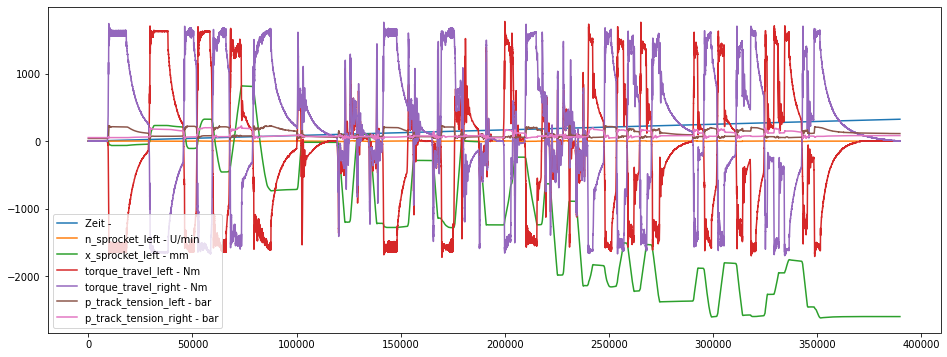

In [56]:
# Plot each feature vs time
fig, ax = plt.subplots(figsize=(16, 6))
for col in df.columns:
    df[col] = df[col].astype('float64')    
    df.plot(y=col, use_index=True, ax=ax)
plt.show()

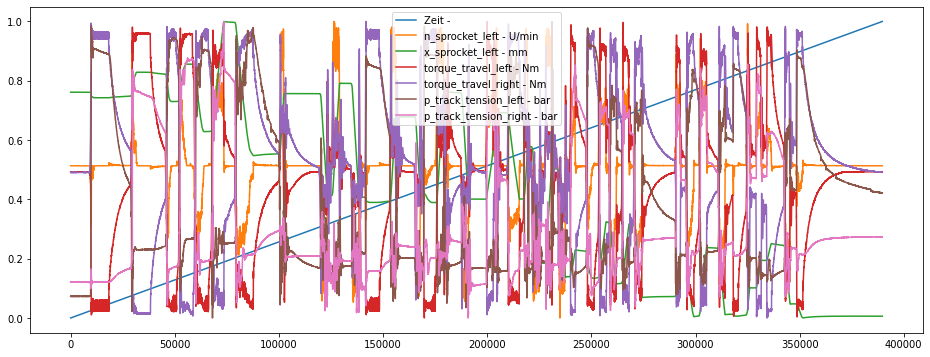

In [57]:
# scaler = StandardScaler()
# scaler = RobustScaler()
scaler = MinMaxScaler()
data_norm = df.copy()
data_norm[:] = scaler.fit_transform(data_norm)
# Plot each feature (normalized) vs time
fig, ax = plt.subplots(figsize=(16, 6))
for col in data_norm.columns:
    data_norm[col] = data_norm[col].astype('float64')    
    data_norm.plot(y=col, use_index=True, ax=ax)
plt.show()

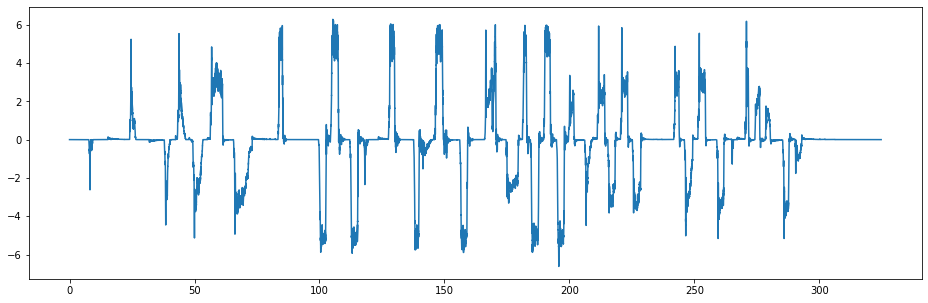

In [58]:
x = df["Zeit - "]
y = df["n_sprocket_left - U/min"]
plt.figure(figsize=(16, 5))
a = plt.plot(x ,y)
limit = 389677/15

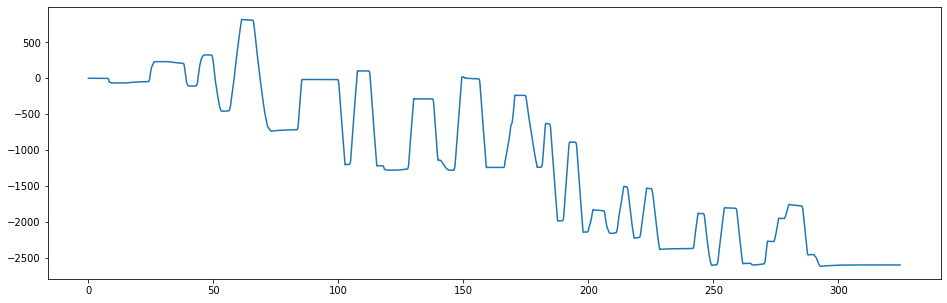

In [59]:
time = df["Zeit - "]
arc_length = df["x_sprocket_left - mm"]
plt.figure(figsize=(16, 5))
a = plt.plot(time , arc_length)


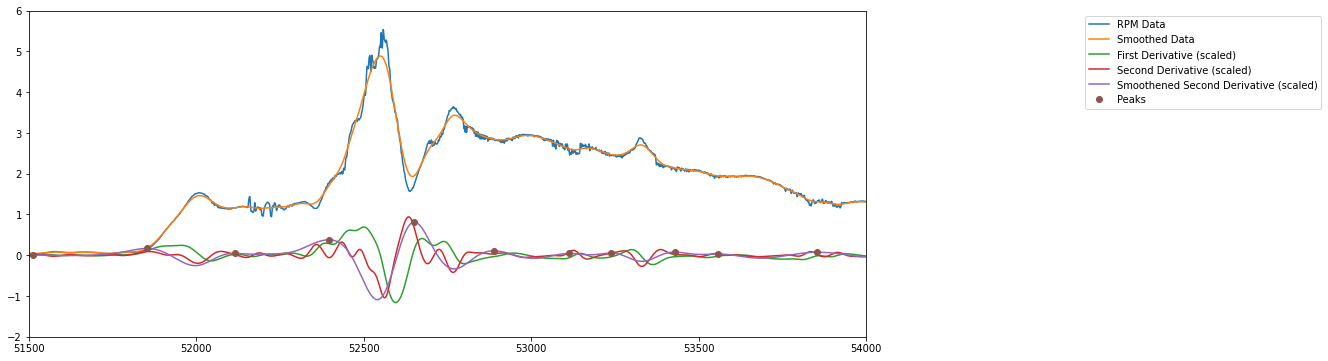

In [122]:
z = df["torque_travel_left - Nm"]

# smoothening
smooth = gaussian_filter1d(y, 20)
# compute derivatives
smooth_d1 = np.gradient(smooth)
smooth_d2 = np.gradient(smooth_d1)
smoothsmooth_d2 = gaussian_filter1d(smooth_d2, 50)
peaks, _ = find_peaks(smoothsmooth_d2)

# find local extrema
#max = argrelextrema(smooth_d1, np.greater)
#print(max)
# find switching points
#infls = np.where(np.diff(np.sign(smooth_d2)))[0]

# plot results
plt.figure(figsize=(15, 6))
plt.plot(y, label='RPM Data')
#plt.plot(z, label='Torque Data')
plt.plot(smooth, label='Smoothed Data')
plt.plot((smooth_d1 / np.max(smooth_d1)), label='First Derivative (scaled)')
plt.plot((smooth_d2 / np.max(smooth_d2)), label='Second Derivative (scaled)')
plt.plot((smoothsmooth_d2 / np.max(smoothsmooth_d2)), label='Smoothened Second Derivative (scaled)')
plt.plot(peaks,smoothsmooth_d2[peaks]/ np.max(smoothsmooth_d2),"o", label='Peaks')
plt.xlim(51500, 54000)
plt.ylim(-2, 6)

#plt.plot(max, label='Maxima')

#for i, infl in enumerate(infls, 1):
#    plt.axvline(x=infl, color='k', label=f'Inflection Point {i}')
#plt.plot(y[94], 5, marker="o", markersize=20)
plt.legend(bbox_to_anchor=(1.55, 1.0))

In [ ]:
#mask = (df["n_sprocket_left - U/min"] < 0.00004) & (df["n_sprocket_left - U/min"] > -0.00003)
#newlist = df.loc[mask]["n_sprocket_left - U/min"]
#newlist

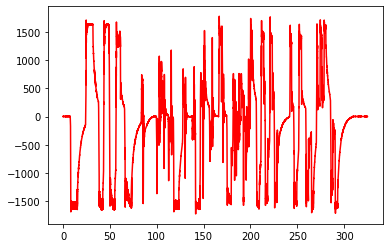

In [10]:
"""x = df["Zeit - "]
y = df["torque_travel_left - Nm"]
plt.plot(x ,y, 'r')
"""

In [11]:
df.shape

(389677, 7)

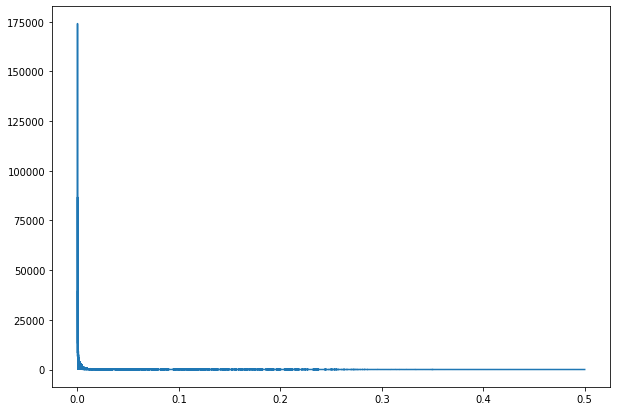

In [28]:
nobs = len(y)
rpm_ft = np.abs(np.fft.rfft(y))
rpm_freq = np.fft.rfftfreq(nobs)

plt.figure(figsize=(10, 7))
plt.plot(rpm_freq[2:], rpm_ft[2: ])
#annot_max(rpm_freq[2:], rpm_ft[2: ])
    
#plt.xlabel('frequency (1/day)')
#plt.show()


In [ ]:
num=np.size(x)
freq = [i / num for i in list(range(num))]
spectrum=f.real*f.real+f.imag*f.imag
nspectrum=spectrum/spectrum[0]

# plot nspectrum per frequency, with a semilog scale on nspectrum
plt.semilogy(freq,nspectrum)

In [ ]:
from scipy import fftpack
y_fft = fftpack.fft(y)
plt.plot(x,y_fft)

In [54]:

test = np.array([2, 1, 2, 3, 2, 0, 1, 0])
max = argrelextrema(x, np.greater)


(array([3, 6], dtype=int64),)